In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
import seaborn as sns
import math, time, random, datetime
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
import warnings
warnings.filterwarnings('ignore')

In [111]:
train=pd.read_csv("train.csv")

In [112]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [114]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [115]:
gensub=pd.read_csv("gender_submission.csv")

In [116]:
gensub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [117]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

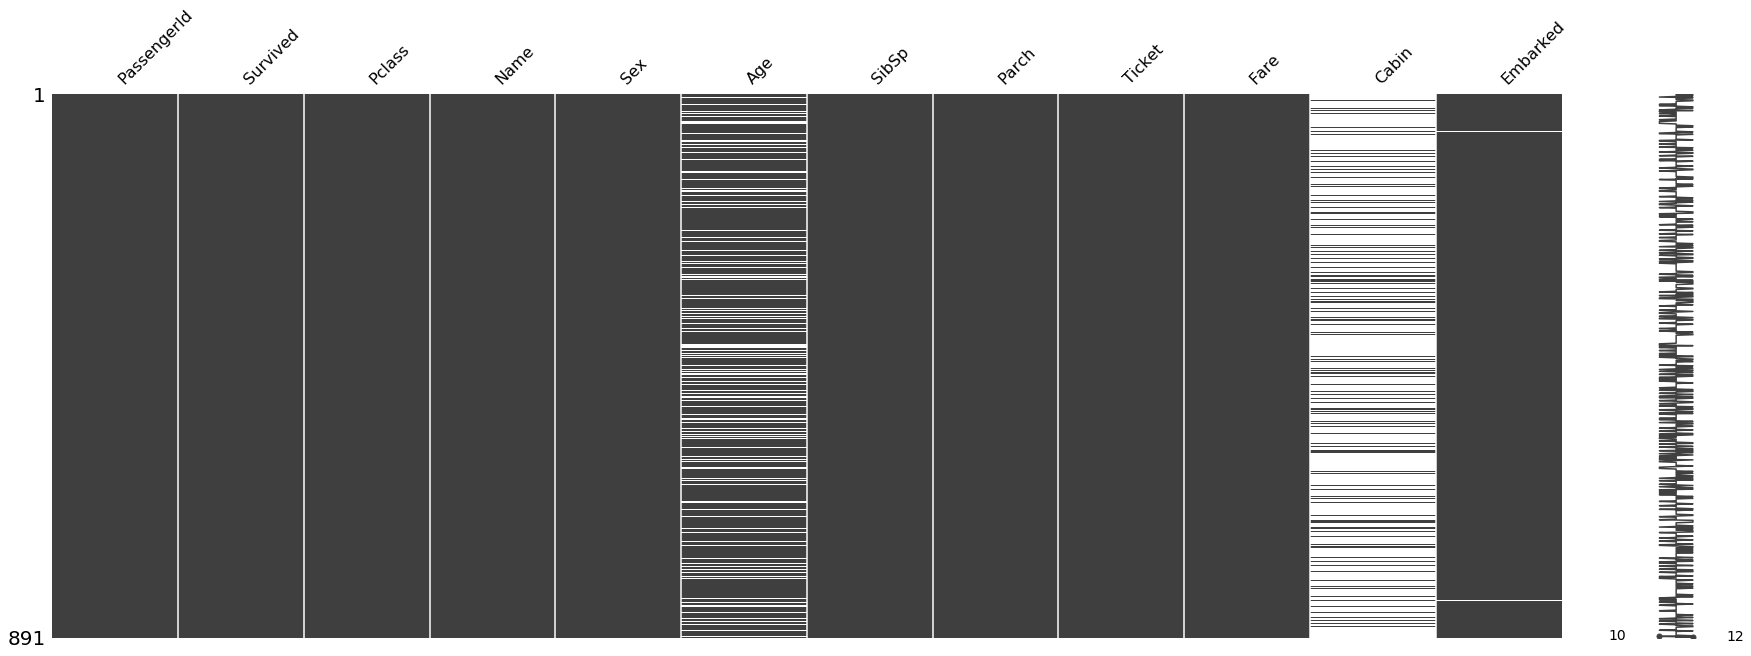

In [118]:
missingno.matrix(train, figsize = (30,10))
#We cannot use cabin

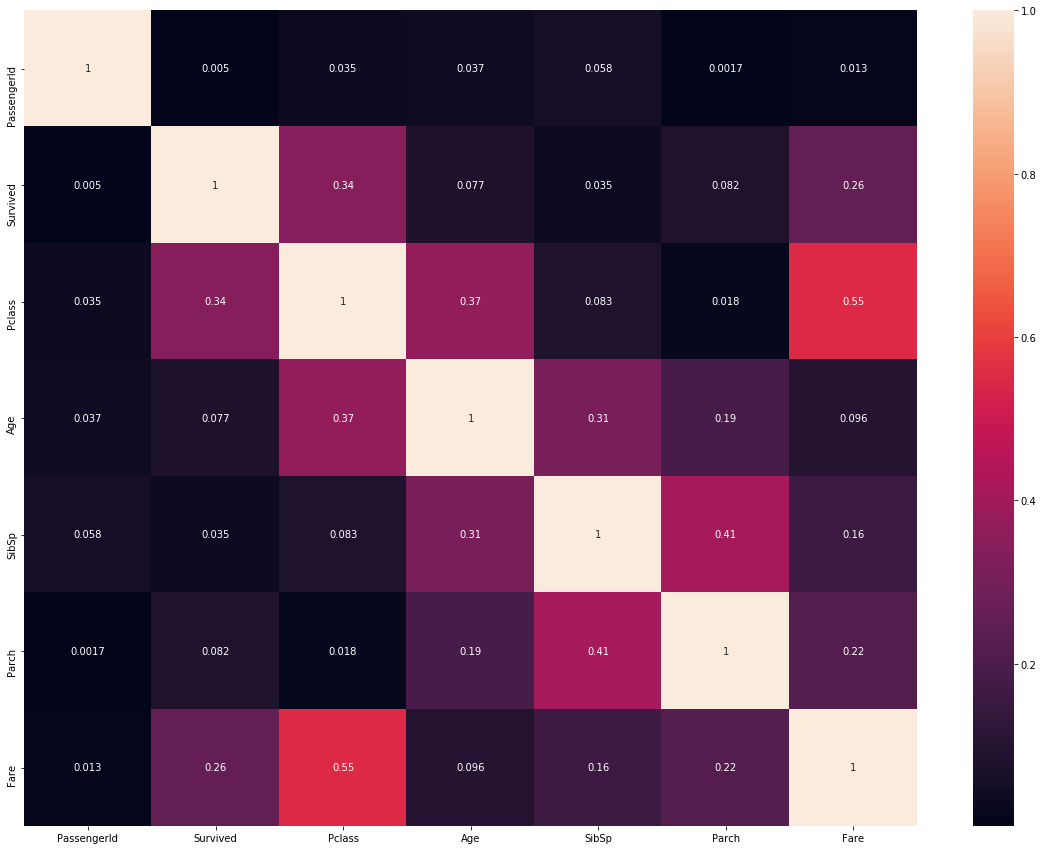

In [119]:
plt.figure(figsize=(20,15))
sns.heatmap(data=train.corr().abs(), annot=True)

0    549
1    342
Name: Survived, dtype: int64


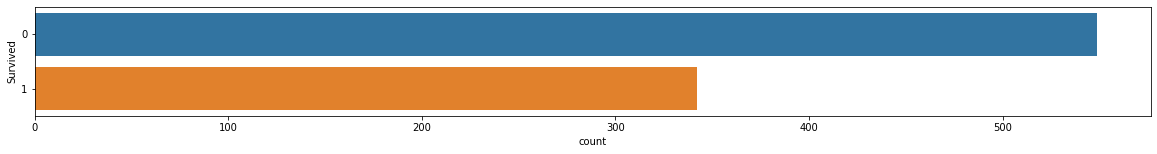

In [120]:
fig=plt.figure(figsize=(20,2))
sns.countplot(y=train.Survived)
print(train.Survived.value_counts())

In [121]:
df_bin=pd.DataFrame()
df_con=pd.DataFrame()

In [122]:
df_bin.head()

""


0

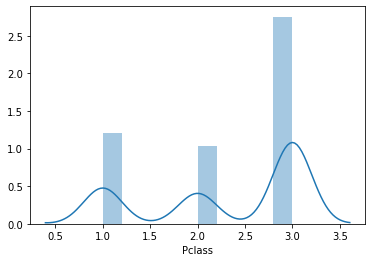

In [123]:
sns.distplot(train.Pclass)
train.Pclass.isnull().sum()

3    491
1    216
2    184
Name: Pclass, dtype: int64


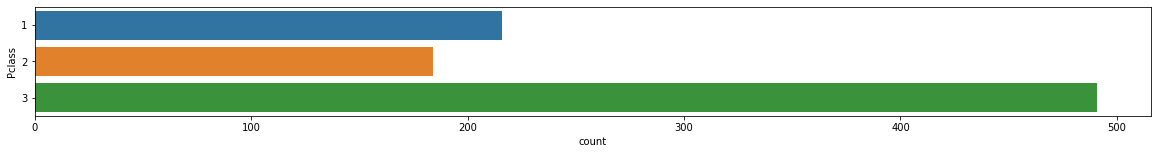

In [124]:
plt.figure(figsize=(20,2))
sns.countplot(y=train.Pclass)
print(train.Pclass.value_counts())

In [125]:
df_bin['Pclass']=train.Pclass
df_con['Pclass']=train.Pclass

In [126]:
train.Name.value_counts()

Maioni, Miss. Roberta                           1
de Pelsmaeker, Mr. Alfons                       1
Olsen, Mr. Ole Martin                           1
Hosono, Mr. Masabumi                            1
Goldenberg, Mrs. Samuel L (Edwiga Grabowska)    1
                                               ..
McGough, Mr. James Robert                       1
Lundahl, Mr. Johan Svensson                     1
Dean, Master. Bertram Vere                      1
Robbins, Mr. Victor                             1
Laroche, Mr. Joseph Philippe Lemercier          1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64


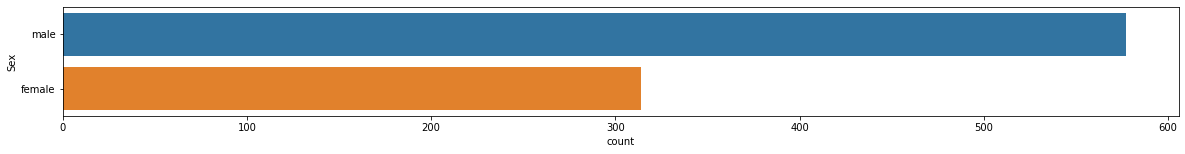

In [127]:
plt.figure(figsize=(20,2))
sns.countplot(y=train.Sex)
print(train.Sex.value_counts())

In [128]:
train.Sex.isnull().sum()

0

In [129]:
train['Sex']=np.where(train['Sex']==1, 'female', 'male')

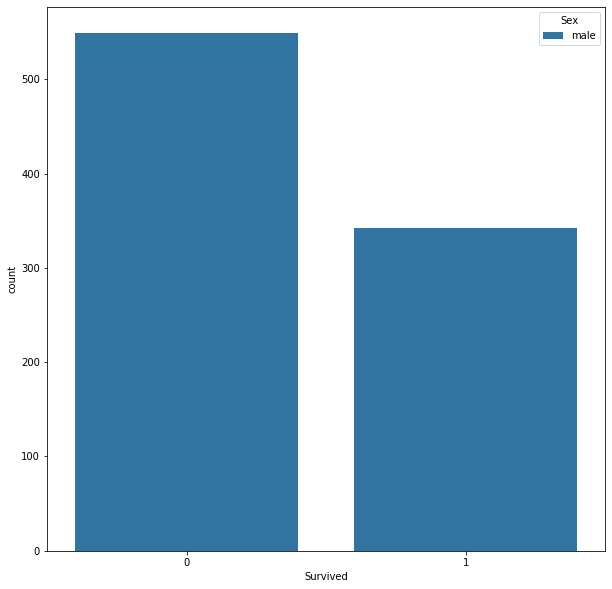

In [130]:
plt.figure(figsize=(10, 10))
sns.countplot(x=train.Survived, hue=train.Sex)

In [131]:
train.Age.isnull().sum()

177

In [132]:
train.SibSp.isnull().sum()

0

In [133]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

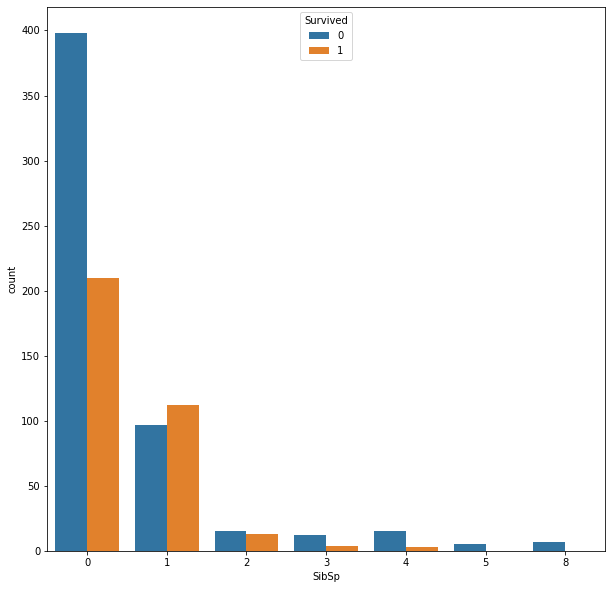

In [134]:
plt.figure(figsize=(10,10))
sns.countplot(x=train.SibSp, hue=train.Survived)

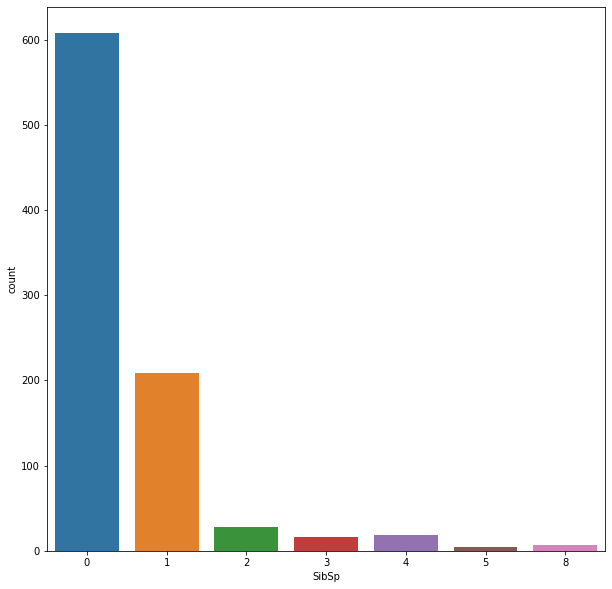

In [135]:
plt.figure(figsize=(10,10))
sns.countplot(x=train.SibSp)

In [136]:
train.Parch.isnull().sum()

0

In [137]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

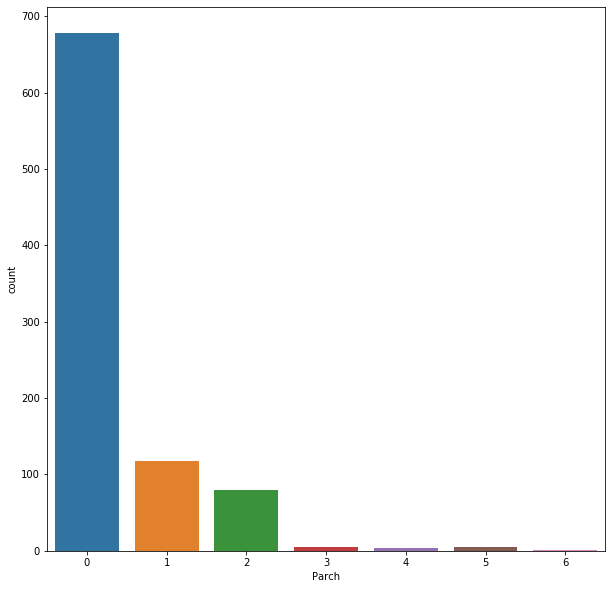

In [138]:
plt.figure(figsize=(10,10))
sns.countplot(x=train.Parch)

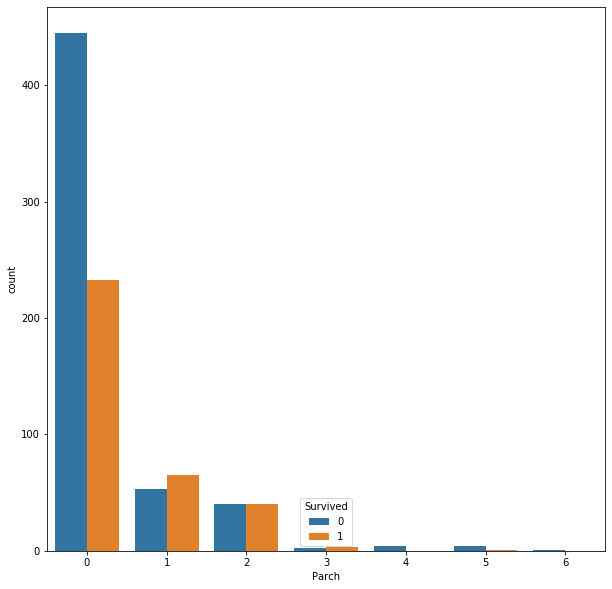

In [139]:
plt.figure(figsize=(10,10))
sns.countplot(x=train.Parch, hue=train.Survived)

In [140]:
train.Ticket.isnull().sum()

0

In [141]:
train.Ticket.value_counts()

CA. 2343           7
1601               7
347082             7
3101295            6
CA 2144            6
                  ..
374887             1
315153             1
SOTON/OQ 392086    1
370372             1
2623               1
Name: Ticket, Length: 681, dtype: int64

In [142]:
train.Fare.isnull().sum()

0

In [143]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [144]:
train.Cabin.isnull().sum()

687

In [145]:
train.drop(["Cabin"], axis=1, inplace=True)

In [146]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",male,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",male,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",male,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",male,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [147]:
train.Embarked.isnull().sum()

2

In [148]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

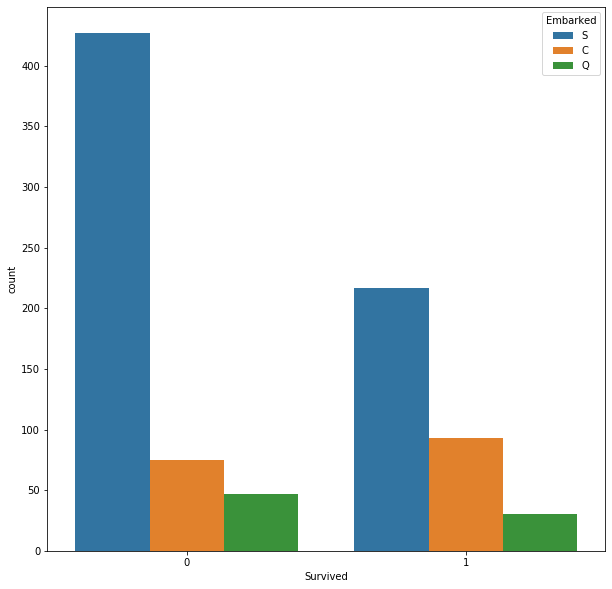

In [149]:
plt.figure(figsize=(10,10))
sns.countplot(x=train.Survived, hue=train.Embarked)

In [154]:
df_bin = pd.DataFrame(zip(train.Survived, train.Pclass, train.Sex, train.SibSp, train.Parch, train.Fare, train.Embarked))
d = {0:'Survived',1:'Pclass',2:'Sex',3:'SibSp',4:'Parch',5:'Fare',6:'Embarked'}
df_bin.rename(columns=d, inplace=True)
df_bin['Sex']=np.where(df_bin['Sex']=="female",1,0)
# Remove Embarked rows which are missing values
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))
df_bin

891


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,S
1,1,1,0,1,0,71.2833,C
2,1,3,0,0,0,7.9250,S
3,1,1,0,1,0,53.1000,S
4,0,3,0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,0,0,0,13.0000,S
887,1,1,0,0,0,30.0000,S
888,0,3,0,1,2,23.4500,S
889,1,1,0,0,0,30.0000,C


In [156]:
df_con = pd.DataFrame(zip(train.Survived, train.Pclass, train.Sex, train.SibSp, train.Parch, train.Fare, train.Embarked))
d = {0:'Survived',1:'Pclass',2:'Sex',3:'SibSp',4:'Parch',5:'Fare',6:'Embarked'}
df_con.rename(columns=d, inplace=True)
df_con = df_con.dropna(subset=['Embarked'])
print(len(df_con))
df_con

889


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,male,1,0,71.2833,C
2,1,3,male,0,0,7.9250,S
3,1,1,male,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S
887,1,1,male,0,0,30.0000,S
888,0,3,male,1,2,23.4500,S
889,1,1,male,0,0,30.0000,C


In [157]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Fare_211.5,Fare_221.7792,Fare_227.525,Fare_247.5208,Fare_262.375,Fare_263.0,Fare_512.3292,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [159]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [160]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [161]:
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,1
3,1,1,0,53.1000,0,0,1,1,1,0,0
4,0,0,0,8.0500,0,0,1,1,0,0,1
5,0,0,0,8.4583,0,1,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,1,1,0,0
7,0,3,1,21.0750,0,0,1,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,1,0


In [162]:
selected_df = df_con_enc

In [163]:
X_train = selected_df.drop('Survived', axis=1)
y_train = selected_df.Survived

In [164]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,1,0,0,1
1,1,0,71.2833,1,0,0,1,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,1
3,1,0,53.1000,0,0,1,1,1,0,0
4,0,0,8.0500,0,0,1,1,0,0,1


In [165]:
X_train.shape

(889, 10)

In [166]:
y_train.shape

(889,)

In [178]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [179]:
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 69.18
Accuracy CV 10-Fold: 68.05
Running Time: 0:00:00.084771


In [180]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 77.39
Accuracy CV 10-Fold: 68.39
Running Time: 0:00:00.072304


In [181]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 68.28
Accuracy CV 10-Fold: 67.49
Running Time: 0:00:00.034012


In [182]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 70.42
Accuracy CV 10-Fold: 66.82
Running Time: 0:00:00.152310


In [183]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 83.69
Accuracy CV 10-Fold: 68.5
Running Time: 0:00:00.054856


In [184]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
               'Linear SVC', 'Decision Tree'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian,  
        acc_linear_svc, 
        acc_dt,
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
4,Decision Tree,83.69
0,KNN,77.39
3,Linear SVC,70.42
1,Logistic Regression,69.18
2,Naive Bayes,68.28
